In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
#from keras.models import Sequential
#from keras.layers import Dense

In [2]:
albedo_top_data=pd.read_csv("..\ML4SCI_GSoC\Messenger\Mercury\mercury-albedo-top-half.png.csv",header=None)

In [3]:
albedo_top_data.head()

0         1         2         3         4         5         6     \
0  0.486275  0.498039  0.521569  0.529412  0.541176  0.596078  0.643137   
1  0.486275  0.498039  0.521569  0.529412  0.541176  0.596078  0.643137   
2  0.027451  0.019608  0.011765  0.007843  0.003922  0.003922  0.007843   
3  0.027451  0.019608  0.011765  0.007843  0.003922  0.003922  0.007843   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

       7         8         9     ...      1430      1431      1432      1433  \
0  0.678431  0.686275  0.698039  ...  0.509804  0.552941  0.600000  0.600000   
1  0.678431  0.686275  0.698039  ...  0.509804  0.552941  0.600000  0.600000   
2  0.019608  0.031373  0.035294  ...  0.015686  0.019608  0.011765  0.011765   
3  0.019608  0.031373  0.035294  ...  0.015686  0.019608  0.011765  0.011765   
4  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   

       1434      1435      1436      1437      1438      1439  
0  0.584314  0.552941  0.501961  0.478431  0.474510  0.474510  
1  0.584314  0.552941  0.501961  0.478431  0.474510  0.474510  
2  0.015686  0.023529  0.015686  0.019608  0.019608  0.031373  
3  0.015686  0.023529  0.015686  0.019608  0.019608  0.031373  
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[5 rows x 1440 columns]

In [4]:
albedo_top_data.describe()

0           1           2           3           4           5     \
count  720.000000  720.000000  720.000000  720.000000  720.000000  720.000000   
mean     0.396427    0.394325    0.391678    0.385904    0.385261    0.380229   
std      0.115433    0.110688    0.105231    0.097998    0.097741    0.101651   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.329412    0.333333    0.333333    0.329412    0.329412    0.321569   
50%      0.384314    0.384314    0.388235    0.384314    0.388235    0.380392   
75%      0.454902    0.447059    0.451961    0.451961    0.447059    0.436275   
max      0.847059    0.850980    0.737255    0.631373    0.737255    0.741176   

             6           7           8           9     ...        1430  \
count  720.000000  720.000000  720.000000  720.000000  ...  720.000000   
mean     0.381144    0.380784    0.376122    0.376601  ...    0.411688   
std      0.100978    0.104517    0.106795    0.106535  ...    0.120430   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.325490    0.325490    0.317647    0.317647  ...    0.344118   
50%      0.384314    0.384314    0.372549    0.372549  ...    0.403922   
75%      0.439216    0.436275    0.435294    0.435294  ...    0.466667   
max      0.737255    0.749020    0.749020    0.768627  ...    0.741176   

             1431        1432        1433        1434        1435        1436  \
count  720.000000  720.000000  720.000000  720.000000  720.000000  720.000000   
mean     0.408704    0.405207    0.400022    0.402952    0.401688    0.403322   
std      0.124439    0.127068    0.126736    0.129505    0.134696    0.134036   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.341176    0.337255    0.337255    0.337255    0.325490    0.329412   
50%      0.398039    0.392157    0.386275    0.388235    0.386275    0.384314   
75%      0.462745    0.450980    0.444118    0.450980    0.447059    0.462745   
max      0.831373    0.854902    0.792157    0.839216    0.901961    0.909804   

             1437        1438        1439  
count  720.000000  720.000000  720.000000  
mean     0.400479    0.397342    0.401797  
std      0.124164    0.119342    0.124844  
min      0.000000    0.000000    0.000000  
25%      0.324510    0.324510    0.328431  
50%      0.390196    0.388235    0.388235  
75%      0.454902    0.450980    0.454902  
max      0.874510    0.835294    0.921569  

[8 rows x 1440 columns]

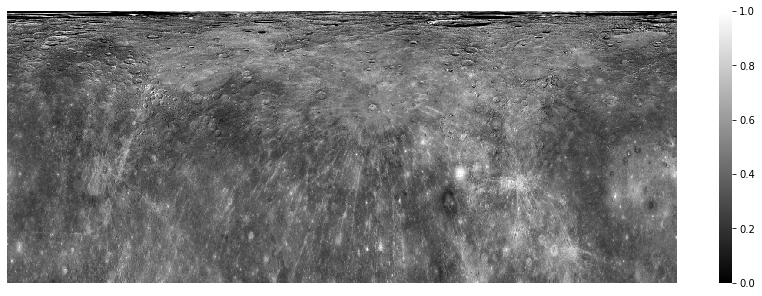

In [5]:
plt.subplots(figsize=(15,5))
sns.heatmap(albedo_top_data,xticklabels=False,yticklabels=False,cmap='gray')

In [6]:
scale_al_top=StandardScaler()
scaled_top=scale_al_top.fit_transform(albedo_top_data)

In [7]:
albedo_bottom_data=pd.read_csv("..\ML4SCI_GSoC\Messenger\Mercury\mercury-albedo-resized-bottom-half.png.csv",header=None)

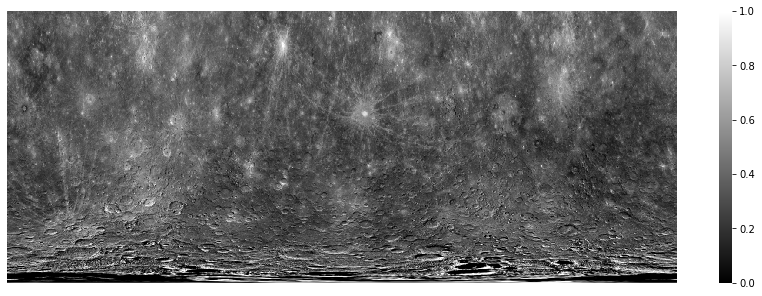

In [8]:
plt.subplots(figsize=(15,5))
sns.heatmap(albedo_bottom_data,xticklabels=False,yticklabels=False,cmap='gray')

In [9]:
mgsi_map_data=pd.read_csv("..\ML4SCI_GSoC\Messenger\Mercury\mgsimap_smooth_032015.png.csv",header=None)
mgsi_map_data.describe()

0           1           2           3           4           5     \
count  720.000000  720.000000  720.000000  720.000000  720.000000  720.000000   
mean     0.485016    0.485289    0.485528    0.485795    0.485234    0.484722   
std      0.110547    0.110530    0.110478    0.110411    0.111816    0.113262   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.450980    0.450980    0.454902    0.454902    0.454902    0.450980   
50%      0.513726    0.513726    0.513726    0.513726    0.513726    0.513726   
75%      0.552941    0.552941    0.552941    0.552941    0.552941    0.552941   
max      0.619608    0.615686    0.615686    0.611765    0.611765    0.607843   

             6           7           8           9     ...        1430  \
count  720.000000  720.000000  720.000000  720.000000  ...  720.000000   
mean     0.484897    0.485871    0.486068    0.486280  ...    0.480191   
std      0.113268    0.111801    0.111829    0.111882  ...    0.113883   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.450980    0.450980    0.450980    0.450980  ...    0.443137   
50%      0.513726    0.513726    0.513726    0.513726  ...    0.509804   
75%      0.550000    0.549020    0.549020    0.549020  ...    0.552941   
max      0.607843    0.603922    0.600000    0.600000  ...    0.615686   

             1431        1432        1433        1434        1435        1436  \
count  720.000000  720.000000  720.000000  720.000000  720.000000  720.000000   
mean     0.480452    0.480779    0.480997    0.482119    0.482446    0.482865   
std      0.113765    0.113674    0.113639    0.112285    0.112227    0.112165   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.443137    0.443137    0.443137    0.443137    0.442157    0.443137   
50%      0.509804    0.509804    0.509804    0.509804    0.509804    0.509804   
75%      0.552941    0.552941    0.552941    0.552941    0.552941    0.552941   
max      0.615686    0.611765    0.611765    0.611765    0.607843    0.607843   

             1437        1438        1439  
count  720.000000  720.000000  720.000000  
mean     0.483170    0.483497    0.483813  
std      0.112118    0.112070    0.112037  
min      0.000000    0.000000    0.000000  
25%      0.447059    0.447059    0.447059  
50%      0.513726    0.513726    0.513726  
75%      0.552941    0.552941    0.552941  
max      0.607843    0.603922    0.603922  

[8 rows x 1440 columns]

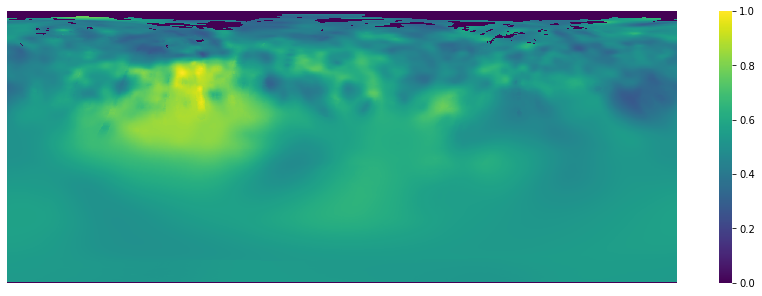

In [10]:
plt.subplots(figsize=(15,5))
sns.heatmap(mgsi_map_data,xticklabels=False,yticklabels=False,cmap='viridis')

In [11]:
scale_mg=StandardScaler()
scaled_mgsi=scale_mg.fit_transform(mgsi_map_data)

In [12]:
alsi_map_data=pd.read_csv("..\ML4SCI_GSoC\Messenger\Mercury\\alsimap_smooth_032015.png.csv",header=None)

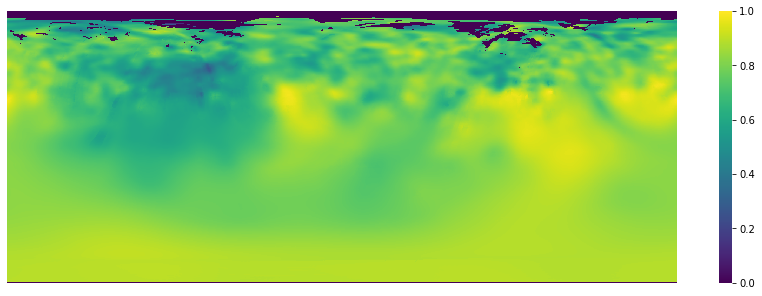

In [13]:
plt.subplots(figsize=(15,5))
sns.heatmap(alsi_map_data,xticklabels=False,yticklabels=False,cmap='viridis')

In [14]:
scale_al=StandardScaler()
scaled_alsi=scale_al.fit_transform(alsi_map_data)

In [15]:
ssi_map_data=pd.read_csv("..\ML4SCI_GSoC\Messenger\Mercury\\ssimap_smooth_032015.png.csv",header=None)

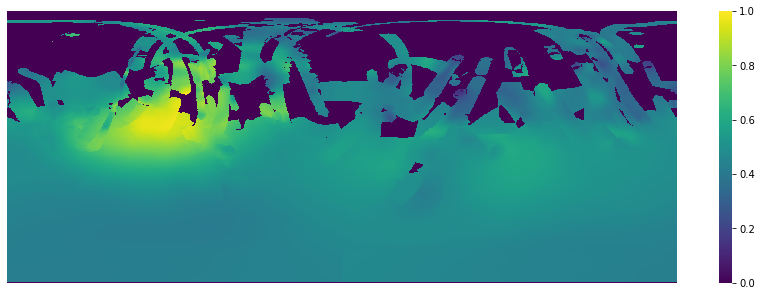

In [16]:
plt.subplots(figsize=(15,5))
sns.heatmap(ssi_map_data,xticklabels=False,yticklabels=False,cmap='viridis')

In [17]:
scale_s=StandardScaler()
scaled_ssi=scale_s.fit_transform(ssi_map_data)

In [18]:
casi_map_data=pd.read_csv("..\ML4SCI_GSoC\Messenger\Mercury\\casimap_smooth_032015.png.csv",header=None)

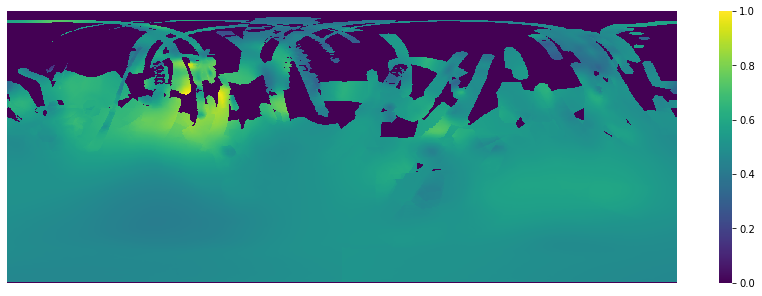

In [19]:
plt.subplots(figsize=(15,5))
sns.heatmap(casi_map_data,xticklabels=False,yticklabels=False,cmap='viridis')

In [20]:
scale_ca=StandardScaler()
scaled_casi=scale_ca.fit_transform(casi_map_data)

In [21]:
fesi_map_data=pd.read_csv("..\ML4SCI_GSoC\Messenger\Mercury\\fesimap_smooth_032015.png.csv",header=None)

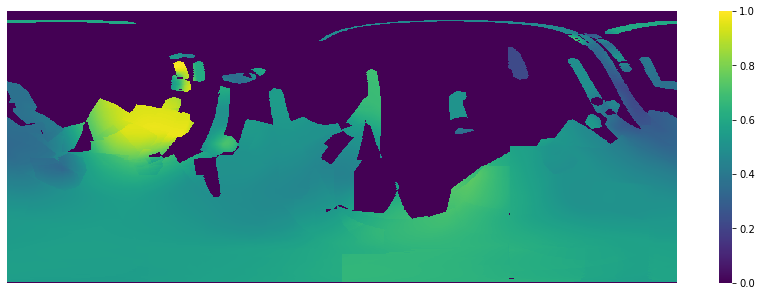

In [22]:
plt.subplots(figsize=(15,5))
sns.heatmap(fesi_map_data,xticklabels=False,yticklabels=False,cmap='viridis')

In [23]:
scale_fe=StandardScaler()
scaled_fesi=scale_fe.fit_transform(fesi_map_data)

In [24]:
# this is the function for converting every dataset into a column vector.
def column_converter(data):
    column_arr=data.reshape(-1,1,order='F') # here order='F' specifies that it will read column vice
    return column_arr
# returned value will be a column vector of type ndarray

In [25]:
albedo_top_column=column_converter(scaled_top)
mgsi_map_column=column_converter(scaled_mgsi)
alsi_map_column=column_converter(scaled_alsi)
ssi_map_column=column_converter(scaled_ssi)
casi_map_column=column_converter(scaled_casi)
fesi_map_column=column_converter(scaled_fesi)

In [26]:
mgsi_map_column.shape

(1036800, 1)

In [27]:
X_train=albedo_top_column

In [28]:
Y_train=np.concatenate((mgsi_map_column,alsi_map_column,ssi_map_column,casi_map_column,fesi_map_column),axis=1)

In [29]:
Y_train.shape

(1036800, 5)

In [30]:
model=LinearRegression(normalize=True)

In [31]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [32]:
pred=model.predict(X_train)

In [33]:
pred.shape

(1036800, 5)

In [34]:
r2_score(Y_train,pred)

0.004471946894451739

In [35]:
model3=DecisionTreeRegressor()
model3.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [36]:
pred3=model3.predict(X_train)

In [37]:
r2_score(Y_train,pred3)

0.43223810735350715

In [38]:
model5=Ridge()

In [39]:
model5.fit(X_train,Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [40]:
pred7=model5.predict(X_train)

In [41]:
r2_score(Y_train,pred7)

0.004471946894440327

In [42]:
modelk=RandomForestRegressor()

In [43]:
modelk.fit(X_train,Y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [44]:
val=modelk.predict(X_train)

In [45]:
r2_score(Y_train,val)

0.4276435386051533

## cross validation score

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
# function for cross validation score.
def crossval_score(model,X,Y):
    score=cross_val_score(model,X,Y,scoring='neg_mean_squared_error')
    score1=np.sqrt(-score)
    return score1.mean(),score1.std()

In [48]:
#dataset for cross validation.
X_cval=X_train[0:150,:]
Y_cval=Y_train[0:150,:]

In [49]:
# random forest cross validation score
cv2_mean,cv2_std=crossval_score(modelk,X_cval,Y_cval)
print("mean:decision tree model:",cv2_mean)
print("std:decision tree model:",cv2_std)

mean:decision tree model: 1.4416537581891533
std:decision tree model: 0.5870498301579595


In [50]:
# decision tree cross validation score
cv2_mean,cv2_std=crossval_score(model3,X_cval,Y_cval)
print("mean:decision tree model:",cv2_mean)
print("std:decision tree model:",cv2_std)

mean:decision tree model: 1.548658178018396
std:decision tree model: 0.5408618481738284


In [51]:
# ridge cross validation score
cv2_mean,cv2_std=crossval_score(model5,X_cval,Y_cval)
print("mean:ridge model:",cv2_mean)
print("std:ridge model:",cv2_std)

mean:ridge model: 1.184835277781369
std:ridge model: 0.7324476044215636


In [52]:
k=val[:,0].reshape(-1,1)


In [53]:
l=k.reshape(-1,1440,order='F')
data=pd.DataFrame(l)
original_constrain_mgsi=scale_mg.inverse_transform(data)

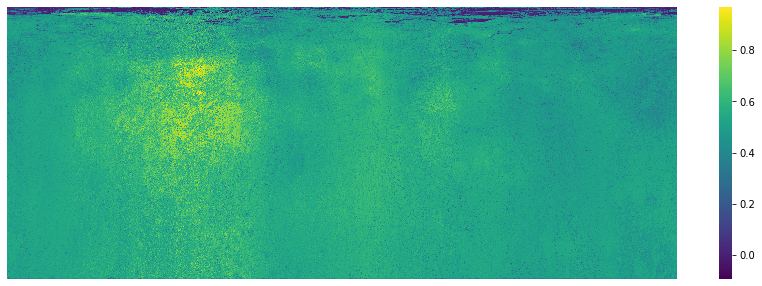

In [54]:
plt.subplots(figsize=(15,5))
sns.heatmap(original_constrain_mgsi,xticklabels=False,yticklabels=False,cmap='viridis')

## testing data preprocessing.

In [55]:
scale_bottom=StandardScaler()
albedo_scaled_bottom=scale_bottom.fit_transform(albedo_bottom_data)

In [56]:
albedo_bottom_column=column_converter(albedo_scaled_bottom)

In [57]:
predicted_chemicals_composition=modelk.predict(albedo_bottom_column)

In [58]:
predicted_chemicals_composition.shape

(1036800, 5)

In [59]:
#chemical columns
mgsi_predicted_column=predicted_chemicals_composition[:,0].reshape(-1,1)
alsi_predicted_column=predicted_chemicals_composition[:,1].reshape(-1,1)
ssi_predicted_column=predicted_chemicals_composition[:,2].reshape(-1,1)
casi_predicted_column=predicted_chemicals_composition[:,3].reshape(-1,1)
fesi_predicted_column=predicted_chemicals_composition[:,4].reshape(-1,1)

In [60]:
# scaled predicted chemical columns
scaled_mgsi_predicted_map=mgsi_predicted_column.reshape(-1,1440,order='F')
scaled_alsi_predicted_map=alsi_predicted_column.reshape(-1,1440,order='F')
scaled_ssi_predicted_map=ssi_predicted_column.reshape(-1,1440,order='F')
scaled_casi_predicted_map=casi_predicted_column.reshape(-1,1440,order='F')
scaled_fesi_predicted_map=fesi_predicted_column.reshape(-1,1440,order='F')

In [61]:
#predicted original chemical map.
mgsi_pred_bottom_map=scale_mg.inverse_transform(scaled_mgsi_predicted_map)
alsi_pred_bottom_map=scale_al.inverse_transform(scaled_alsi_predicted_map)
ssi_pred_bottom_map=scale_s.inverse_transform(scaled_ssi_predicted_map)
casi_pred_bottom_map=scale_ca.inverse_transform(scaled_casi_predicted_map)
fesi_pred_bottom_map=scale_fe.inverse_transform(scaled_fesi_predicted_map)

Text(0.5, 1, 'predicted mgsi for bottom of mercury')

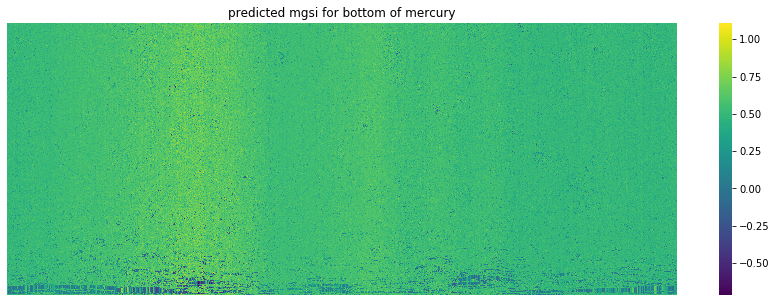

In [81]:
plt.subplots(figsize=(15,5))
sns.heatmap(mgsi_pred_bottom_map,xticklabels=False,yticklabels=False,cmap='viridis')
plt.title('predicted mgsi for bottom of mercury')

Text(0.5, 1, 'predicted alsi for bottom of mercury')

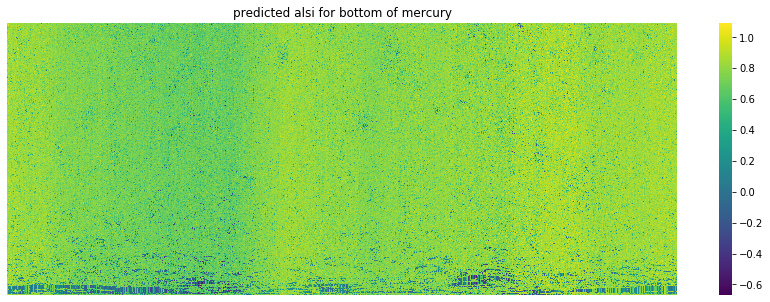

In [82]:
plt.subplots(figsize=(15,5))
sns.heatmap(alsi_pred_bottom_map,xticklabels=False,yticklabels=False,cmap='viridis')
plt.title('predicted alsi for bottom of mercury')

Text(0.5, 1, 'predicted ssi for bottom of mercury')

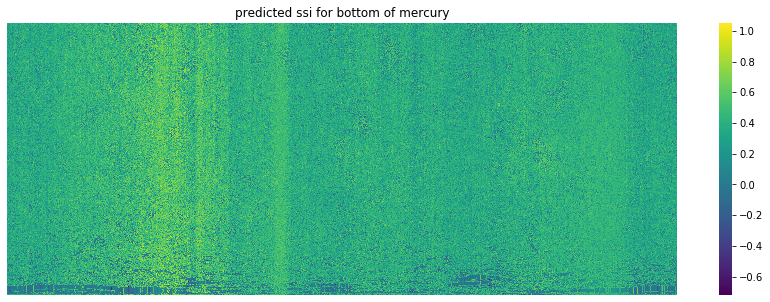

In [83]:
plt.subplots(figsize=(15,5))
sns.heatmap(ssi_pred_bottom_map,xticklabels=False,yticklabels=False,cmap='viridis')
plt.title('predicted ssi for bottom of mercury')

Text(0.5, 1, 'predicted casi for bottom of mercury')

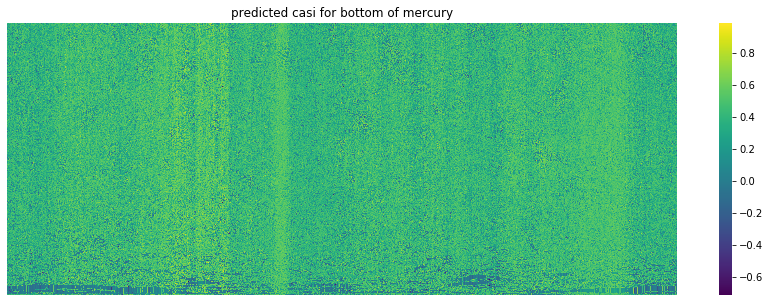

In [84]:
plt.subplots(figsize=(15,5))
sns.heatmap(casi_pred_bottom_map,xticklabels=False,yticklabels=False,cmap='viridis')
plt.title('predicted casi for bottom of mercury')

Text(0.5, 1, 'predicted fesi for bottom of mercury')

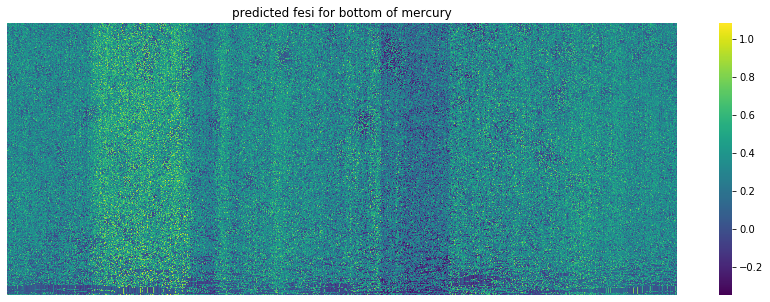

In [85]:
plt.subplots(figsize=(15,5))
sns.heatmap(fesi_pred_bottom_map,xticklabels=False,yticklabels=False,cmap='viridis')
plt.title('predicted fesi for bottom of mercury')